In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pprint
import pyspark
import pyspark.sql.functions as F

from pyspark.sql.functions import col
from pyspark.sql.types import StringType, IntegerType, FloatType, DateType

import utils.data_processing_bronze_table
import utils.data_processing_silver_table
import utils.data_processing_gold_table

print('Done!')

Done!


## Set up PySpark session

In [2]:
# Initialize SparkSession
spark = pyspark.sql.SparkSession.builder \
    .appName("dev") \
    .master("local[*]") \
    .getOrCreate()

# Set log level to ERROR to hide warnings
spark.sparkContext.setLogLevel("ERROR")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/21 03:38:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Set up Config

In [3]:
# set up config
snapshot_date_str = "2023-01-01"

start_date_str = "2023-01-01"
end_date_str = "2025-12-01"

In [4]:
# generate list of dates to process
def generate_first_of_month_dates(start_date_str, end_date_str):
    # Convert the date strings to datetime objects
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    end_date = datetime.strptime(end_date_str, "%Y-%m-%d")
    
    # List to store the first of month dates
    first_of_month_dates = []

    # Start from the first of the month of the start_date
    current_date = datetime(start_date.year, start_date.month, 1)

    while current_date <= end_date:
        # Append the date in yyyy-mm-dd format
        first_of_month_dates.append(current_date.strftime("%Y-%m-%d"))
        
        # Move to the first of the next month
        if current_date.month == 12:
            current_date = datetime(current_date.year + 1, 1, 1)
        else:
            current_date = datetime(current_date.year, current_date.month + 1, 1)

    return first_of_month_dates

dates_str_lst = generate_first_of_month_dates(start_date_str, end_date_str)
dates_str_lst

['2023-01-01',
 '2023-02-01',
 '2023-03-01',
 '2023-04-01',
 '2023-05-01',
 '2023-06-01',
 '2023-07-01',
 '2023-08-01',
 '2023-09-01',
 '2023-10-01',
 '2023-11-01',
 '2023-12-01',
 '2024-01-01',
 '2024-02-01',
 '2024-03-01',
 '2024-04-01',
 '2024-05-01',
 '2024-06-01',
 '2024-07-01',
 '2024-08-01',
 '2024-09-01',
 '2024-10-01',
 '2024-11-01',
 '2024-12-01',
 '2025-01-01',
 '2025-02-01',
 '2025-03-01',
 '2025-04-01',
 '2025-05-01',
 '2025-06-01',
 '2025-07-01',
 '2025-08-01',
 '2025-09-01',
 '2025-10-01',
 '2025-11-01',
 '2025-12-01']

## Build Bronze Table

### LMS

In [5]:
# create bronze datalake
# create multiple csv files 
bronze_lms_directory = "datamart/bronze/lms/"

if not os.path.exists(bronze_lms_directory):
    os.makedirs(bronze_lms_directory)

In [6]:
# run bronze backfill
for date_str in dates_str_lst:
    utils.data_processing_bronze_table.process_bronze_table_lms(date_str, bronze_lms_directory, spark)

2023-01-01row count: 530
saved to: datamart/bronze/lms/bronze_loan_daily_2023_01_01.csv
2023-02-01row count: 1031
saved to: datamart/bronze/lms/bronze_loan_daily_2023_02_01.csv
2023-03-01row count: 1537
saved to: datamart/bronze/lms/bronze_loan_daily_2023_03_01.csv
2023-04-01row count: 2047
saved to: datamart/bronze/lms/bronze_loan_daily_2023_04_01.csv
2023-05-01row count: 2568
saved to: datamart/bronze/lms/bronze_loan_daily_2023_05_01.csv
2023-06-01row count: 3085
saved to: datamart/bronze/lms/bronze_loan_daily_2023_06_01.csv
2023-07-01row count: 3556
saved to: datamart/bronze/lms/bronze_loan_daily_2023_07_01.csv
2023-08-01row count: 4037
saved to: datamart/bronze/lms/bronze_loan_daily_2023_08_01.csv
2023-09-01row count: 4491
saved to: datamart/bronze/lms/bronze_loan_daily_2023_09_01.csv
2023-10-01row count: 4978
saved to: datamart/bronze/lms/bronze_loan_daily_2023_10_01.csv
2023-11-01row count: 5469
saved to: datamart/bronze/lms/bronze_loan_daily_2023_11_01.csv
2023-12-01row count: 5

In [7]:
# inspect output
utils.data_processing_bronze_table.process_bronze_table_lms(dates_str_lst[0], bronze_lms_directory, spark).toPandas()

2023-01-01row count: 530
saved to: datamart/bronze/lms/bronze_loan_daily_2023_01_01.csv


,loan_id,Customer_ID,loan_start_date,tenure,installment_num,loan_amt,due_amt,paid_amt,overdue_amt,balance,snapshot_date
0,CUS_0x1037_2023_01_01,CUS_0x1037,2023-01-01,10,0,10000,0.0,0.0,0.0,10000.0,2023-01-01
1,CUS_0x1069_2023_01_01,CUS_0x1069,2023-01-01,10,0,10000,0.0,0.0,0.0,10000.0,2023-01-01
2,CUS_0x114a_2023_01_01,CUS_0x114a,2023-01-01,10,0,10000,0.0,0.0,0.0,10000.0,2023-01-01
3,CUS_0x1184_2023_01_01,CUS_0x1184,2023-01-01,10,0,10000,0.0,0.0,0.0,10000.0,2023-01-01
4,CUS_0x1297_2023_01_01,CUS_0x1297,2023-01-01,10,0,10000,0.0,0.0,0.0,10000.0,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...
525,CUS_0xe98_2023_01_01,CUS_0xe98,2023-01-01,10,0,10000,0.0,0.0,0.0,10000.0,2023-01-01
526,CUS_0xea6_2023_01_01,CUS_0xea6,2023-01-01,10,0,10000,0.0,0.0,0.0,10000.0,2023-01-01
527,CUS_0xed3_2023_01_01,CUS_0xed3,2023-01-01,10,0,10000,0.0,0.0,0.0,10000.0,2023-01-01
528,CUS_0xed8_2023_01_01,CUS_0xed8,2023-01-01,10,0,10000,0.0,0.0,0.0,10000.0,2023-01-01


### Features Attributes

In [8]:
# create bronze datalake
bronze_attributes_directory = "datamart/bronze/attributes/"

if not os.path.exists(bronze_attributes_directory):
    os.makedirs(bronze_attributes_directory)

In [9]:
# No need to be partitioned
utils.data_processing_bronze_table.process_bronze_table_attributes(bronze_attributes_directory, spark).toPandas()

row count: 12500
saved to: datamart/bronze/attributes/bronze_attributes.csv


,Customer_ID,Name,Age,SSN,Occupation,snapshot_date
0,CUS_0x1000,Alistair Barrf,18,913-74-1218,Lawyer,2023-05-01
1,CUS_0x1009,Arunah,26,063-67-6938,Mechanic,2025-01-01
2,CUS_0x100b,Shirboni,19,#F%$D@*&8,Media_Manager,2024-03-01
3,CUS_0x1011,Schneyerh,44,793-05-8223,Doctor,2023-11-01
4,CUS_0x1013,Cameront,44,930-49-9615,Mechanic,2023-12-01
...,...,...,...,...,...,...
12495,CUS_0xff3,Somervilled,55,#F%$D@*&8,Scientist,2024-06-01
12496,CUS_0xff4,Poornimaf,37,655-05-7666,Entrepreneur,2024-12-01
12497,CUS_0xff6,Shieldsb,19,541-92-8371,Doctor,2024-10-01
12498,CUS_0xffc,Brads,18,226-86-7294,Musician,2024-01-01


### Features Financials

In [10]:
# create bronze datalake
bronze_financials_directory = "datamart/bronze/financials/"

if not os.path.exists(bronze_financials_directory):
    os.makedirs(bronze_financials_directory)

In [11]:
# No need to be partitioned
utils.data_processing_bronze_table.process_bronze_table_financials(bronze_financials_directory, spark).toPandas()

row count: 12500
saved to: datamart/bronze/financials/bronze_financials.csv


,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,snapshot_date
0,CUS_0x1000,30625.94,2706.161667,6,5,27,2,"Credit-Builder Loan, and Home Equity Loan",57,26,...,Bad,1562.91,30.077191,10 Years and 9 Months,Yes,42.941090,77.31427572208112,High_spent_Medium_value_payments,400.36080052211616,2023-05-01
1,CUS_0x1009,52312.68_,4250.390000,6,5,17,4,"Not Specified, Home Equity Loan, Credit-Builde...",5,18,...,_,202.68,40.286997,31 Years and 0 Months,Yes,108.366467,58.66019164829086,High_spent_Medium_value_payments,508.01234122645366,2025-01-01
2,CUS_0x100b,113781.38999999998,9549.782500,1,4,1,0,None,14,8,...,Good,1030.2,28.592943,15 Years and 10 Months,No,0.000000,617.0792665202719,High_spent_Small_value_payments,597.8989834797281,2024-03-01
3,CUS_0x1011,58918.47,5208.872500,3,3,17,3,"Student Loan, Credit-Builder Loan, and Debt Co...",27,13,...,Standard,473.14,27.829959,15 Years and 10 Months,Yes,123.434939,383.35084463651407,Low_spent_Medium_value_payments,294.1014665671429,2023-11-01
4,CUS_0x1013,98620.98,7962.415000,3,3,6,3,"Student Loan, Debt Consolidation Loan, and Per...",12,9,...,Good,1233.51,26.524864,17 Years and 10 Months,No,228.018084,332.3337079767732,High_spent_Medium_value_payments,485.8897083704929,2023-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,CUS_0xff3,17032.785,1176.398750,0,6,2,3,"Personal Loan, Mortgage Loan, and Auto Loan",13,7_,...,Good,1229.08,26.915577,17 Years and 3 Months,No,33.299764,81.19585741743609,Low_spent_Small_value_payments,293.14425404017936,2024-06-01
12496,CUS_0xff4,25546.26,2415.855000,8,7,14,5_,"Not Specified, Student Loan, Student Loan, Cre...",15,13_,...,Standard,758.44,39.333488,18 Years and 9 Months,Yes,101.328637,189.81586133347676,Low_spent_Medium_value_payments,230.44100130267208,2024-12-01
12497,CUS_0xff6,117639.92,9727.326667,5,6,1,2,"Home Equity Loan, and Auto Loan",-3,7,...,Good,338.3,32.871853,24 Years and 11 Months,No,126.638453,534.0885271982645,Low_spent_Medium_value_payments,592.0056861539196,2024-10-01
12498,CUS_0xffc,60877.17,5218.097500,6,8,27,8,"Credit-Builder Loan, Payday Loan, Not Specifie...",46,14,...,_,1300.13,29.026498,13 Years and 1 Months,Yes,272.809169,46.4256138380274,High_spent_Large_value_payments,442.5749666782518,2024-01-01


## Build Silver Table

### LMS

In [12]:
# create silver datalake
silver_loan_daily_directory = "datamart/silver/loan_daily/"

if not os.path.exists(silver_loan_daily_directory):
    os.makedirs(silver_loan_daily_directory)

In [13]:
# run silver backfill
for date_str in dates_str_lst:
    utils.data_processing_silver_table.process_silver_table_lms(date_str, bronze_lms_directory, silver_loan_daily_directory, spark)

loaded from: datamart/bronze/lms/bronze_loan_daily_2023_01_01.csv row count: 530


saved to: datamart/silver/loan_daily/silver_loan_daily_2023_01_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_02_01.csv row count: 1031


saved to: datamart/silver/loan_daily/silver_loan_daily_2023_02_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_03_01.csv row count: 1537


saved to: datamart/silver/loan_daily/silver_loan_daily_2023_03_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_04_01.csv row count: 2047
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_04_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_05_01.csv row count: 2568


saved to: datamart/silver/loan_daily/silver_loan_daily_2023_05_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_06_01.csv row count: 3085


saved to: datamart/silver/loan_daily/silver_loan_daily_2023_06_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_07_01.csv row count: 3556
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_07_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_08_01.csv row count: 4037
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_08_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_09_01.csv row count: 4491


saved to: datamart/silver/loan_daily/silver_loan_daily_2023_09_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_10_01.csv row count: 4978
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_10_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_11_01.csv row count: 5469
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_11_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_12_01.csv row count: 5428


saved to: datamart/silver/loan_daily/silver_loan_daily_2023_12_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_01_01.csv row count: 5412


saved to: datamart/silver/loan_daily/silver_loan_daily_2024_01_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_02_01.csv row count: 5424
saved to: datamart/silver/loan_daily/silver_loan_daily_2024_02_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_03_01.csv row count: 5425
saved to: datamart/silver/loan_daily/silver_loan_daily_2024_03_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_04_01.csv row count: 5417


saved to: datamart/silver/loan_daily/silver_loan_daily_2024_04_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_05_01.csv row count: 5391


saved to: datamart/silver/loan_daily/silver_loan_daily_2024_05_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_06_01.csv row count: 5418


saved to: datamart/silver/loan_daily/silver_loan_daily_2024_06_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_07_01.csv row count: 5442


saved to: datamart/silver/loan_daily/silver_loan_daily_2024_07_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_08_01.csv row count: 5531


saved to: datamart/silver/loan_daily/silver_loan_daily_2024_08_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_09_01.csv row count: 5537
saved to: datamart/silver/loan_daily/silver_loan_daily_2024_09_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_10_01.csv row count: 5502


saved to: datamart/silver/loan_daily/silver_loan_daily_2024_10_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_11_01.csv row count: 5501


saved to: datamart/silver/loan_daily/silver_loan_daily_2024_11_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_12_01.csv row count: 5531
saved to: datamart/silver/loan_daily/silver_loan_daily_2024_12_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2025_01_01.csv row count: 5539


saved to: datamart/silver/loan_daily/silver_loan_daily_2025_01_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2025_02_01.csv row count: 5028


saved to: datamart/silver/loan_daily/silver_loan_daily_2025_02_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2025_03_01.csv row count: 4515


saved to: datamart/silver/loan_daily/silver_loan_daily_2025_03_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2025_04_01.csv row count: 4024


saved to: datamart/silver/loan_daily/silver_loan_daily_2025_04_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2025_05_01.csv row count: 3526
saved to: datamart/silver/loan_daily/silver_loan_daily_2025_05_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2025_06_01.csv row count: 3021
saved to: datamart/silver/loan_daily/silver_loan_daily_2025_06_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2025_07_01.csv row count: 2478
saved to: datamart/silver/loan_daily/silver_loan_daily_2025_07_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2025_08_01.csv row count: 1985


saved to: datamart/silver/loan_daily/silver_loan_daily_2025_08_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2025_09_01.csv row count: 1529
saved to: datamart/silver/loan_daily/silver_loan_daily_2025_09_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2025_10_01.csv row count: 1041


saved to: datamart/silver/loan_daily/silver_loan_daily_2025_10_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2025_11_01.csv row count: 526
saved to: datamart/silver/loan_daily/silver_loan_daily_2025_11_01.parquet
No record found on Date: 2025-12-01


In [14]:
utils.data_processing_silver_table.process_silver_table_lms(dates_str_lst[0], bronze_lms_directory, silver_loan_daily_directory, spark).toPandas()

loaded from: datamart/bronze/lms/bronze_loan_daily_2023_01_01.csv row count: 530


saved to: datamart/silver/loan_daily/silver_loan_daily_2023_01_01.parquet


,loan_id,Customer_ID,loan_start_date,tenure,installment_num,loan_amt,due_amt,paid_amt,overdue_amt,balance,snapshot_date,mob,installments_missed,first_missed_date,dpd
0,CUS_0x1037_2023_01_01,CUS_0x1037,2023-01-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2023-01-01,0,0,None,0
1,CUS_0x1069_2023_01_01,CUS_0x1069,2023-01-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2023-01-01,0,0,None,0
2,CUS_0x114a_2023_01_01,CUS_0x114a,2023-01-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2023-01-01,0,0,None,0
3,CUS_0x1184_2023_01_01,CUS_0x1184,2023-01-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2023-01-01,0,0,None,0
4,CUS_0x1297_2023_01_01,CUS_0x1297,2023-01-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2023-01-01,0,0,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,CUS_0xe98_2023_01_01,CUS_0xe98,2023-01-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2023-01-01,0,0,None,0
526,CUS_0xea6_2023_01_01,CUS_0xea6,2023-01-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2023-01-01,0,0,None,0
527,CUS_0xed3_2023_01_01,CUS_0xed3,2023-01-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2023-01-01,0,0,None,0
528,CUS_0xed8_2023_01_01,CUS_0xed8,2023-01-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2023-01-01,0,0,None,0


### Features Attributes + Financials (Customer)

In [15]:
# create silver datalake
silver_customer_directory = "datamart/silver/customer/"

if not os.path.exists(silver_customer_directory):
    os.makedirs(silver_customer_directory)

In [16]:
utils.data_processing_silver_table.process_silver_table_customer(bronze_attributes_directory, bronze_financials_directory, silver_customer_directory, spark).toPandas()

loaded from: datamart/bronze/attributes/bronze_attributes.csv row count: 12500
loaded from: datamart/bronze/financials/bronze_financials.csv row count: 12500
12500


saved to: datamart/silver/customer/silver_customer.parquet


,Customer_ID,snapshot_date,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,months,Credit_History_Months,spending_scale,value_payments_scale,Credit_Mix_scale,is_payment_min_amount_yes,is_payment_min_amount_no,debt_to_income_ratio,income_to_emi_ratio,emi_to_balance_ratio
0,CUS_0x1000,2023-05-01,Alistair Barrf,18,913-74-1218,Lawyer,30625.939453,2706.161621,6,5,...,9,129,2,2,1,1,0,0.051031,61.586129,0.106989
1,CUS_0x1009,2025-01-01,Arunah,26,063-67-6938,Mechanic,52312.679688,4250.390137,6,5,...,0,372,2,2,0,1,0,0.003874,38.863741,0.212896
2,CUS_0x100b,2024-03-01,Shirboni,19,#F%$D@*&8,Media_Manager,113781.390625,9549.782227,1,4,...,10,190,2,1,3,0,1,0.009054,9549.782500,0.000000
3,CUS_0x1011,2023-11-01,Schneyerh,44,793-05-8223,Doctor,58918.468750,5208.872559,3,3,...,10,190,1,2,2,1,0,0.008030,41.860209,0.418280
4,CUS_0x1013,2023-12-01,Cameront,44,930-49-9615,Mechanic,98620.976562,7962.415039,3,3,...,10,214,2,2,3,0,1,0.012507,34.767626,0.468316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,CUS_0xff3,2024-06-01,Somervilled,55,#F%$D@*&8,Scientist,17032.785156,1176.398804,0,6,...,3,207,1,1,3,0,1,0.072155,34.297576,0.113209
12496,CUS_0xff4,2024-12-01,Poornimaf,37,655-05-7666,Entrepreneur,25546.259766,2415.854980,8,7,...,9,225,1,2,2,1,0,0.029688,23.608787,0.437816
12497,CUS_0xff6,2024-10-01,Shieldsb,19,541-92-8371,Doctor,117639.921875,9727.327148,5,6,...,11,299,1,2,3,0,1,0.002876,76.210001,0.213554
12498,CUS_0xffc,2024-01-01,Brads,18,226-86-7294,Musician,60877.171875,5218.097656,6,8,...,1,157,2,3,0,1,0,0.021356,19.057424,0.615024


## EDA on credit labels

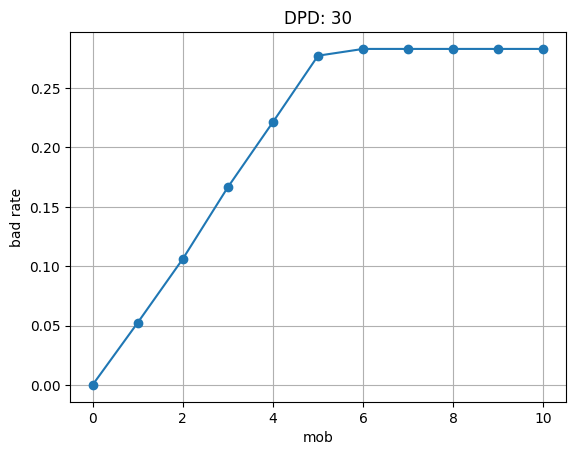

In [17]:
# set dpd label definition
dpd = 30

# Path to the folder containing CSV files
folder_path = silver_loan_daily_directory

# Read all CSV files into a single DataFrame
files_list = [folder_path+os.path.basename(f) for f in glob.glob(os.path.join(folder_path, '*'))]
df = spark.read.option("header", "true").parquet(*files_list)

# filter only completed loans
df = df.filter(col("loan_start_date") < datetime.strptime("2024-01-01", "%Y-%m-%d"))

# create dpd flag if more than dpd
df = df.withColumn("dpd_flag", F.when(col("dpd") >= dpd, 1).otherwise(0))

# actual bads 
actual_bads_df = df.filter(col("installment_num") == 10)


# visualise bad rate
pdf = df.toPandas()

# Group by col_A and count occurrences in col_B
grouped = pdf.groupby('mob')['dpd_flag'].mean()

# Sort the index (x-axis) of the grouped DataFrame
grouped = grouped.sort_index()

# Plotting
grouped.plot(kind='line', marker='o')

plt.title('DPD: '+ str(dpd))
plt.xlabel('mob')
plt.ylabel('bad rate')
plt.grid(True)
plt.show()


In [18]:
df.show()

+--------------------+-----------+---------------+------+---------------+--------+-------+--------+-----------+-------+-------------+---+-------------------+-----------------+---+--------+
|             loan_id|Customer_ID|loan_start_date|tenure|installment_num|loan_amt|due_amt|paid_amt|overdue_amt|balance|snapshot_date|mob|installments_missed|first_missed_date|dpd|dpd_flag|
+--------------------+-----------+---------------+------+---------------+--------+-------+--------+-----------+-------+-------------+---+-------------------+-----------------+---+--------+
|CUS_0x1011_2023_1...| CUS_0x1011|     2023-11-01|    10|             10| 10000.0| 1000.0|  1000.0|        0.0|    0.0|   2024-09-01| 10|                  0|             NULL|  0|       0|
|CUS_0x1013_2023_1...| CUS_0x1013|     2023-12-01|    10|              9| 10000.0| 1000.0|  1000.0|        0.0| 1000.0|   2024-09-01|  9|                  0|             NULL|  0|       0|
|CUS_0x1018_2023_1...| CUS_0x1018|     2023-11-01|    1

## Build Gold Table for labels

In [19]:
# create gold datalake
gold_label_store_directory = "datamart/gold/label_store/"

if not os.path.exists(gold_label_store_directory):
    os.makedirs(gold_label_store_directory)

In [20]:
# run gold backfill
for date_str in dates_str_lst:
    utils.data_processing_gold_table.process_labels_gold_table_label_store(date_str, silver_loan_daily_directory, gold_label_store_directory, spark, dpd = 30, mob = 6)

loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_01_01.parquet row count: 530


saved to: datamart/gold/label_store/gold_label_store_2023_01_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_02_01.parquet row count: 1031


saved to: datamart/gold/label_store/gold_label_store_2023_02_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_03_01.parquet row count: 1537
saved to: datamart/gold/label_store/gold_label_store_2023_03_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_04_01.parquet row count: 2047
saved to: datamart/gold/label_store/gold_label_store_2023_04_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_05_01.parquet row count: 2568
saved to: datamart/gold/label_store/gold_label_store_2023_05_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_06_01.parquet row count: 3085


saved to: datamart/gold/label_store/gold_label_store_2023_06_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_07_01.parquet row count: 3556


saved to: datamart/gold/label_store/gold_label_store_2023_07_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_08_01.parquet row count: 4037


saved to: datamart/gold/label_store/gold_label_store_2023_08_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_09_01.parquet row count: 4491


saved to: datamart/gold/label_store/gold_label_store_2023_09_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_10_01.parquet row count: 4978


saved to: datamart/gold/label_store/gold_label_store_2023_10_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_11_01.parquet row count: 5469


saved to: datamart/gold/label_store/gold_label_store_2023_11_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_12_01.parquet row count: 5428


saved to: datamart/gold/label_store/gold_label_store_2023_12_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_01_01.parquet row count: 5412


saved to: datamart/gold/label_store/gold_label_store_2024_01_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_02_01.parquet row count: 5424


saved to: datamart/gold/label_store/gold_label_store_2024_02_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_03_01.parquet row count: 5425


saved to: datamart/gold/label_store/gold_label_store_2024_03_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_04_01.parquet row count: 5417


saved to: datamart/gold/label_store/gold_label_store_2024_04_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_05_01.parquet row count: 5391


saved to: datamart/gold/label_store/gold_label_store_2024_05_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_06_01.parquet row count: 5418


saved to: datamart/gold/label_store/gold_label_store_2024_06_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_07_01.parquet row count: 5442


saved to: datamart/gold/label_store/gold_label_store_2024_07_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_08_01.parquet row count: 5531


saved to: datamart/gold/label_store/gold_label_store_2024_08_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_09_01.parquet row count: 5537


saved to: datamart/gold/label_store/gold_label_store_2024_09_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_10_01.parquet row count: 5502
saved to: datamart/gold/label_store/gold_label_store_2024_10_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_11_01.parquet row count: 5501


saved to: datamart/gold/label_store/gold_label_store_2024_11_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_12_01.parquet row count: 5531


saved to: datamart/gold/label_store/gold_label_store_2024_12_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2025_01_01.parquet row count: 5539


saved to: datamart/gold/label_store/gold_label_store_2025_01_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2025_02_01.parquet row count: 5028


saved to: datamart/gold/label_store/gold_label_store_2025_02_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2025_03_01.parquet row count: 4515


saved to: datamart/gold/label_store/gold_label_store_2025_03_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2025_04_01.parquet row count: 4024


saved to: datamart/gold/label_store/gold_label_store_2025_04_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2025_05_01.parquet row count: 3526


saved to: datamart/gold/label_store/gold_label_store_2025_05_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2025_06_01.parquet row count: 3021
saved to: datamart/gold/label_store/gold_label_store_2025_06_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2025_07_01.parquet row count: 2478


saved to: datamart/gold/label_store/gold_label_store_2025_07_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2025_08_01.parquet row count: 1985


saved to: datamart/gold/label_store/gold_label_store_2025_08_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2025_09_01.parquet row count: 1529


saved to: datamart/gold/label_store/gold_label_store_2025_09_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2025_10_01.parquet row count: 1041


saved to: datamart/gold/label_store/gold_label_store_2025_10_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2025_11_01.parquet row count: 526


saved to: datamart/gold/label_store/gold_label_store_2025_11_01.parquet
No record found on Date: 2025-12-01


In [21]:
utils.data_processing_gold_table.process_labels_gold_table_label_store(dates_str_lst[0], silver_loan_daily_directory, gold_label_store_directory, spark, dpd = 30, mob = 6).dtypes

loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_01_01.parquet row count: 530


saved to: datamart/gold/label_store/gold_label_store_2023_01_01.parquet


[('loan_id', 'string'),
 ('Customer_ID', 'string'),
 ('label', 'int'),
 ('label_def', 'string'),
 ('snapshot_date', 'date')]

In [22]:
folder_path = gold_label_store_directory
files_list = [folder_path+os.path.basename(f) for f in glob.glob(os.path.join(folder_path, '*'))]
df = spark.read.option("header", "true").parquet(*files_list)
print("row_count:",df.count())

unique_count = df.select("Customer_ID").distinct().count()
print("Unique Customer_IDs:", unique_count)

df.show()

row_count: 12500


Unique Customer_IDs: 12500
+--------------------+-----------+-----+----------+-------------+
|             loan_id|Customer_ID|label| label_def|snapshot_date|
+--------------------+-----------+-----+----------+-------------+
|CUS_0x10ac_2024_0...| CUS_0x10ac|    0|30dpd_6mob|   2025-02-01|
|CUS_0x10c5_2024_0...| CUS_0x10c5|    1|30dpd_6mob|   2025-02-01|
|CUS_0x1145_2024_0...| CUS_0x1145|    1|30dpd_6mob|   2025-02-01|
|CUS_0x11ac_2024_0...| CUS_0x11ac|    0|30dpd_6mob|   2025-02-01|
|CUS_0x122c_2024_0...| CUS_0x122c|    0|30dpd_6mob|   2025-02-01|
|CUS_0x1274_2024_0...| CUS_0x1274|    1|30dpd_6mob|   2025-02-01|
|CUS_0x1288_2024_0...| CUS_0x1288|    1|30dpd_6mob|   2025-02-01|
|CUS_0x12cc_2024_0...| CUS_0x12cc|    1|30dpd_6mob|   2025-02-01|
|CUS_0x1338_2024_0...| CUS_0x1338|    0|30dpd_6mob|   2025-02-01|
|CUS_0x1370_2024_0...| CUS_0x1370|    1|30dpd_6mob|   2025-02-01|
|CUS_0x1378_2024_0...| CUS_0x1378|    1|30dpd_6mob|   2025-02-01|
|CUS_0x139b_2024_0...| CUS_0x139b|    0|30dpd_6mo

In [23]:
df.printSchema()

root
 |-- loan_id: string (nullable = true)
 |-- Customer_ID: string (nullable = true)
 |-- label: integer (nullable = true)
 |-- label_def: string (nullable = true)
 |-- snapshot_date: date (nullable = true)



## Build Gold Table for features

In [24]:
# create gold datalake
gold_feature_store_directory = "datamart/gold/feature_store/"

if not os.path.exists(gold_feature_store_directory):
    os.makedirs(gold_feature_store_directory)

In [25]:
utils.data_processing_gold_table.process_labels_gold_table_feature_store(silver_customer_directory, gold_feature_store_directory, spark).printSchema()

loaded from: datamart/silver/customer/silver_customer.parquet row count: 12500


saved to: datamart/gold/feature_store/gold_feature_store.parquet
root
 |-- Customer_ID: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Annual_Income: float (nullable = true)
 |-- Monthly_Inhand_Salary: float (nullable = true)
 |-- Num_Bank_Accounts: integer (nullable = true)
 |-- Num_Credit_Card: integer (nullable = true)
 |-- Interest_Rate: float (nullable = true)
 |-- Num_of_Loan: integer (nullable = true)
 |-- Delay_from_due_date: integer (nullable = true)
 |-- Num_of_Delayed_Payment: integer (nullable = true)
 |-- Changed_Credit_Limit: float (nullable = true)
 |-- Num_Credit_Inquiries: integer (nullable = true)
 |-- Outstanding_Debt: float (nullable = true)
 |-- Credit_Utilization_Ratio: float (nullable = true)
 |-- Total_EMI_per_month: float (nullable = true)
 |-- Amount_invested_monthly: float (nullable = true)
 |-- Monthly_Balance: float (nullable = true)
 |-- Credit_History_Months: integer (nullable = true)
 |-- spending_scale: integer (nullable = true)
 |-- 

<!-- ## Build Gold Table for features -->